# Import python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define functions for Antoine equations

In [2]:
def P1_sat(t):
  return np.exp(14.2724-2945.47/(t+224.0))
def P2_sat(t):
  return np.exp(14.2043-2972.64/(t+209.0))

# Calculate single component vapor pressures

In [3]:
t = 75.0 # degC
print("P1_sat({}\u00B0C) = {} kPa and P2_sat({}\u00B0C) = {} kPa".format(t, np.round(P1_sat(t), 2), t, np.round(P2_sat(t), 2)))

P1_sat(75.0°C) = 83.21 kPa and P2_sat(75.0°C) = 41.98 kPa


# Define functions needed for BUBL P calculation

In [4]:
def P(x1, t):
  return P2_sat(t) + (P1_sat(t) - P2_sat(t))*x1
def Y1(x1, t):
  return x1*P1_sat(t)/P(x1, t)

# Construct P-x-y table

In [5]:
x1s = np.arange(0.0, 1.2, 0.2)
y1s = np.round(Y1(x1s, t), 4)
ps = np.round(P(x1s, t), 2)
table = {'x1': x1s, 'y1': y1s, 'P/kPa': ps}
df = pd.DataFrame.from_dict(table)
print(df)

    x1      y1  P/kPa
0  0.0  0.0000  41.98
1  0.2  0.3313  50.23
2  0.4  0.5692  58.47
3  0.6  0.7483  66.72
4  0.8  0.8880  74.96
5  1.0  1.0000  83.21


# Construct P-x-y plot

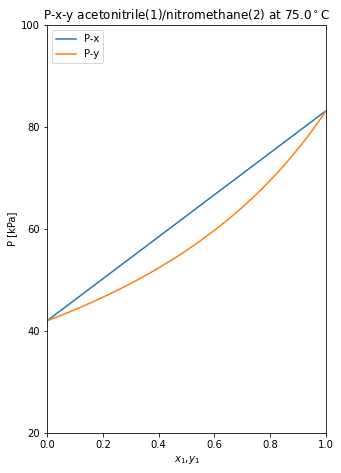

In [6]:
xs = np.arange(0.0, 1.01, 0.01)
plt.figure(figsize=(5, 7.5))
plt.plot(xs, P(xs, t))
plt.plot(Y1(xs, t), P(xs, t))
plt.title("P-x-y acetonitrile(1)/nitromethane(2) at {}$^\circ$C".format(t))
plt.ylabel("P [kPa]")
plt.xlabel("$x_1$,$y_1$")
plt.xlim(0.0, 1.0)
plt.ylim(20.0, 100.0)
plt.yticks(np.arange(20.,120.,20.))
plt.legend(['P-x', 'P-y'], loc=2)

# Perform DEW P calculation

In [7]:
def DEW_P(y1, t):
  p = 1/(y1/P1_sat(t)+(1-y1)/P2_sat(t))
  x1 = y1*p/P1_sat(t)
  return p, x1

y1 = 0.60
p, x1 = DEW_P(y1, t)
print("At y1 = {} and T = {} degC, P = {} kPa and x1 = {}".format(y1, t, np.round(p, 2), np.round(x1, 4)))

At y1 = 0.6 and T = 75.0 degC, P = 59.74 kPa and x1 = 0.4308
